In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# loading Data

In [5]:
df=pd.read_csv('DS1_C1_S5_Store Data_Practice.csv')
df.head()

,Order ID,Customer ID,State,City,Order Date,Ship Date,Ship Mode,Segment,Category,Year,Discount,Profit,Quantity,Sales
0,CA-2015-115812,BH-11710,California,Los Angeles,09-06-2015,14-06-2015,Standard Class,Consumer,Phones,2018,20%,90.72,6,907
1,CA-2015-115812,BH-11710,California,Los Angeles,09-06-2015,14-06-2015,Standard Class,Consumer,Phones,2018,20%,68.36,4,911
2,CA-2015-143336,ZD-21925,California,San Francisco,27-08-2015,01-09-2015,Second Class,Consumer,Phones,2018,20%,16.01,3,213
3,CA-2017-121755,EH-13945,California,Los Angeles,16-01-2017,20-01-2017,Second Class,Consumer,Accessories,2020,0%,11.77,3,91
4,CA-2016-135545,KM-16720,California,Los Angeles,24-11-2016,30-11-2016,Standard Class,Consumer,Accessories,2019,0%,6.15,2,14


In [6]:
df2=df

In [7]:
# understanding data structure
df2.columns

Index(['Order ID', 'Customer ID', 'State', 'City', 'Order Date', 'Ship Date',
       'Ship Mode', 'Segment', 'Category', 'Year', 'Discount', 'Profit',
       'Quantity', 'Sales'],
      dtype='object')

In [8]:
df2.shape

(359, 14)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     359 non-null    object 
 1   Customer ID  359 non-null    object 
 2   State        359 non-null    object 
 3   City         359 non-null    object 
 4   Order Date   359 non-null    object 
 5   Ship Date    359 non-null    object 
 6   Ship Mode    359 non-null    object 
 7   Segment      359 non-null    object 
 8   Category     359 non-null    object 
 9   Year         359 non-null    int64  
 10  Discount     359 non-null    object 
 11  Profit       359 non-null    float64
 12  Quantity     359 non-null    int64  
 13  Sales        359 non-null    int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 39.4+ KB


In [10]:
df2.describe()

,Year,Profit,Quantity,Sales
count,359.000000,359.000000,359.000000,359.000000
mean,2018.710306,82.089777,3.913649,443.674095
std,0.848712,150.887200,2.300305,685.155923
min,2018.000000,-131.500000,1.000000,1.000000
25%,2018.000000,13.095000,2.000000,84.500000
50%,2018.000000,34.740000,3.000000,206.000000
75%,2020.000000,79.275000,5.000000,480.000000
max,2020.000000,1049.990000,14.000000,4800.000000


In [11]:
df2.columns=['Order_ID', 'Customer_ID', 'State', 'City', 'Order_Date', 'Ship_Date',
       'Ship_Mode', 'Segment', 'Category', 'Year', 'Discount', 'Profit',
       'Quantity', 'Sales']

In [12]:
df=df2

In [13]:
cat=df2.select_dtypes(include='object')# categorical data types

In [14]:
cat.columns# categorical columns

Index(['Order_ID', 'Customer_ID', 'State', 'City', 'Order_Date', 'Ship_Date',
       'Ship_Mode', 'Segment', 'Category', 'Discount'],
      dtype='object')

In [15]:
df2.Order_ID.value_counts()

Order_ID
CA-2016-157770    3
US-2017-126452    3
CA-2018-105487    3
CA-2018-105410    3
US-2015-138247    3
                 ..
CA-2015-153983    1
CA-2016-118871    1
CA-2018-126662    1
CA-2017-129868    1
CA-2018-121258    1
Name: count, Length: 298, dtype: int64

In [16]:
#missing value treatment
df2.isnull().sum()

Order_ID       0
Customer_ID    0
State          0
City           0
Order_Date     0
Ship_Date      0
Ship_Mode      0
Segment        0
Category       0
Year           0
Discount       0
Profit         0
Quantity       0
Sales          0
dtype: int64

# no missing values

In [18]:
label_encoder=preprocessing.LabelEncoder()


In [19]:
for i in cat.columns:
    df2[f'{i}_encode']=label_encoder.fit_transform(df2[i])

In [20]:
df2.head()

,Order_ID,Customer_ID,State,City,Order_Date,Ship_Date,Ship_Mode,Segment,Category,Year,...,Order_ID_encode,Customer_ID_encode,State_encode,City_encode,Order_Date_encode,Ship_Date_encode,Ship_Mode_encode,Segment_encode,Category_encode,Discount_encode
0,CA-2015-115812,BH-11710,California,Los Angeles,09-06-2015,14-06-2015,Standard Class,Consumer,Phones,2018,...,11,29,0,21,78,108,3,0,3,1
1,CA-2015-115812,BH-11710,California,Los Angeles,09-06-2015,14-06-2015,Standard Class,Consumer,Phones,2018,...,11,29,0,21,78,108,3,0,3,1
2,CA-2015-143336,ZD-21925,California,San Francisco,27-08-2015,01-09-2015,Second Class,Consumer,Phones,2018,...,33,245,0,35,229,4,2,0,3,1
3,CA-2017-121755,EH-13945,California,Los Angeles,16-01-2017,20-01-2017,Second Class,Consumer,Accessories,2020,...,120,77,0,21,128,154,2,0,0,0
4,CA-2016-135545,KM-16720,California,Los Angeles,24-11-2016,30-11-2016,Standard Class,Consumer,Accessories,2019,...,74,144,0,21,203,249,3,0,0,0


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order_ID            359 non-null    object 
 1   Customer_ID         359 non-null    object 
 2   State               359 non-null    object 
 3   City                359 non-null    object 
 4   Order_Date          359 non-null    object 
 5   Ship_Date           359 non-null    object 
 6   Ship_Mode           359 non-null    object 
 7   Segment             359 non-null    object 
 8   Category            359 non-null    object 
 9   Year                359 non-null    int64  
 10  Discount            359 non-null    object 
 11  Profit              359 non-null    float64
 12  Quantity            359 non-null    int64  
 13  Sales               359 non-null    int64  
 14  Order_ID_encode     359 non-null    int32  
 15  Customer_ID_encode  359 non-null    int32  
 16  State_en

In [24]:
def feature_scale(scale):
    numerics=['int64','float64','int32']
    new_df=df2.select_dtypes(include=numerics)
    if scale=='minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
    return df_scaled

In [26]:
scale='minmax'
loan_df_scaled=feature_scale(scale)
loan_df_scaled.head()

,Year,Profit,Quantity,Sales,Order_ID_encode,Customer_ID_encode,State_encode,City_encode,Order_Date_encode,Ship_Date_encode,Ship_Mode_encode,Segment_encode,Category_encode,Discount_encode
0,0.0,0.188085,0.384615,0.188789,0.037037,0.118367,0.0,0.446809,0.294340,0.413793,1.000000,0.0,1.0,0.5
1,0.0,0.169159,0.230769,0.189623,0.037037,0.118367,0.0,0.446809,0.294340,0.413793,1.000000,0.0,1.0,0.5
2,0.0,0.124851,0.153846,0.044176,0.111111,1.000000,0.0,0.744681,0.864151,0.015326,0.666667,0.0,1.0,0.5
3,1.0,0.121262,0.153846,0.018754,0.404040,0.314286,0.0,0.446809,0.483019,0.590038,0.666667,0.0,0.0,0.0
4,0.5,0.116505,0.076923,0.002709,0.249158,0.587755,0.0,0.446809,0.766038,0.954023,1.000000,0.0,0.0,0.0


In [28]:
# feature_aelection
corr=loan_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Profit,Quantity,Sales,Order_ID_encode,Customer_ID_encode,State_encode,City_encode,Order_Date_encode,Ship_Date_encode,Ship_Mode_encode,Segment_encode,Category_encode,Discount_encode
Year,1.000000,0.059126,-0.061495,0.083156,-0.022714,0.070195,nan,-0.020291,0.021462,0.007715,0.003999,-0.015390,-0.005251,-0.580094
Profit,0.059126,1.000000,0.206340,0.775331,0.045576,0.046834,nan,-0.040247,-0.063111,-0.061399,-0.091566,-0.006607,-0.161009,-0.045995
Quantity,-0.061495,0.206340,1.000000,0.284019,-0.026752,0.015644,nan,0.006560,0.005330,0.037834,0.050755,-0.060934,0.033318,0.054924
Sales,0.083156,0.775331,0.284019,1.000000,-0.007423,0.021584,nan,-0.005966,-0.030021,-0.043423,-0.117405,0.019308,0.087696,-0.040061
Order_ID_encode,-0.022714,0.045576,-0.026752,-0.007423,1.000000,0.007656,nan,-0.115720,-0.054230,0.111479,-0.050114,0.105783,-0.044465,0.100417
Customer_ID_encode,0.070195,0.046834,0.015644,0.021584,0.007656,1.000000,nan,0.158906,-0.047760,0.100344,-0.106219,-0.075457,-0.184510,-0.054065
State_encode,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
City_encode,-0.020291,-0.040247,0.006560,-0.005966,-0.115720,0.158906,nan,1.000000,-0.028008,0.001721,-0.031658,-0.123463,-0.045946,0.031570
Order_Date_encode,0.021462,-0.063111,0.005330,-0.030021,-0.054230,-0.047760,nan,-0.028008,1.000000,0.403754,-0.052024,-0.046772,0.104497,-0.054770
Ship_Date_encode,0.007715,-0.061399,0.037834,-0.043423,0.111479,0.100344,nan,0.001721,0.403754,1.000000,-0.064582,-0.021694,-0.004380,-0.054724


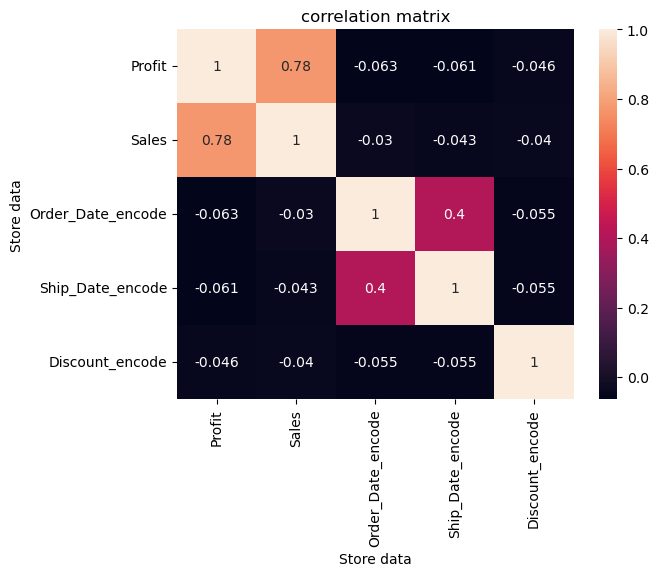

In [54]:
# correlation heatmpa
new_loan_df=loan_df_scaled[['Profit', 'Sales', 
       'Order_Date_encode', 'Ship_Date_encode','Discount_encode' ]]
hm=sns.heatmap(new_loan_df.corr(),annot=True)
hm.set(xlabel='Store data',ylabel='Store data',title='correlation matrix')
plt.show()

In [38]:
loan_df_scaled.columns

Index(['Year', 'Profit', 'Quantity', 'Sales', 'Order_ID_encode',
       'Customer_ID_encode', 'State_encode', 'City_encode',
       'Order_Date_encode', 'Ship_Date_encode', 'Ship_Mode_encode',
       'Segment_encode', 'Category_encode', 'Discount_encode'],
      dtype='object')

In [36]:
df2.columns

Index(['Order_ID', 'Customer_ID', 'State', 'City', 'Order_Date', 'Ship_Date',
       'Ship_Mode', 'Segment', 'Category', 'Year', 'Discount', 'Profit',
       'Quantity', 'Sales', 'Order_ID_encode', 'Customer_ID_encode',
       'City_encode', 'Order_Date_encode', 'Ship_Date_encode',
       'Ship_Mode_encode', 'Segment_encode', 'Category_encode',
       'Discount_encode'],
      dtype='object')

In [58]:
df2.shape#359

(359, 23)

In [62]:
train_num=int(359*0.7)
load_df_train=df2.iloc[:train_num,:]
load_df_test=df2.iloc[(train_num+1):,:]
load_df_train.shape

(251, 23)

In [64]:
load_df_test.shape

(107, 23)

# using fn 

In [69]:
y=df2['Sales']
x=df2
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [71]:
x_train.shape

(251, 23)

In [73]:
x_test.shape

(108, 23)

In [75]:
y_train.shape

(251,)

In [79]:
y_test.shape

(108,)